# *TP1 - DEEP LEARNING*

<table style="width:100%">
  <tr>
    <td style="text-align:left"><strong>Préparé par :</strong> EL Warraqi Imane</td>
    <td style="text-align:right"><strong>Encadré par :</strong> Pr. HAMZA EL KHALFI </td>
  </tr>
</table>

### 2.5 Application à MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import numpy as np
import matplotlib.pyplot as plt

#### Écriver votre propre code, pour charger la dataset MNIST depuis pytorch et utiliser l'architecture de notre réseau de neurones précédement dévelopé  pour classifier les différents chifffre de 0 à 10. 

In [2]:
# charger les utilitaires de générations et visualisation des données
from mnisdata import *

In [3]:
# préparer et visualiser le jeux de données
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]


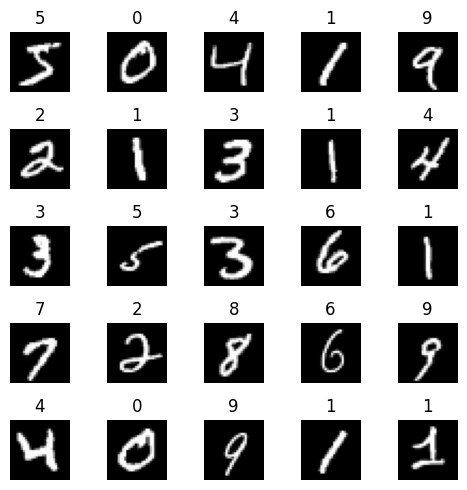

In [4]:
import torch
import matplotlib.pyplot as plt

def plot_mnist_samples(data, n=25):
    # Récupération des données
    Xtrain = data.Xtrain
    Ytrain = torch.argmax(data.Ytrain, dim=1).long()  # labels entiers
    
    # On choisit les n premiers échantillons
    plt.figure(figsize=(5,5))
    for i in range(n):
        plt.subplot(5,5,i+1)
        img = Xtrain[i].reshape(28,28)  # reshape en 28x28
        label = Ytrain[i].item()        # récupération du label entier
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Appel de la fonction
plot_mnist_samples(data, n=25)


In [5]:
from torch.utils.data import DataLoader, TensorDataset

In [6]:
eta = 0.03   # learning rate

# Initialisation du modèle
def init_model(nx, nh, ny, eta):
    model = nn.Sequential(
        nn.Linear(nx, nh),
        nn.ReLU(),
        nn.Linear(nh, ny)
    )
    loss_fn = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)
    return model, loss_fn, optim

model, loss_fn, optim = init_model(nx, nh, ny, eta)

In [7]:

# Conversion des labels one-hot en labels entiers
Ytrain_int = torch.argmax(data.Ytrain, dim=1).long()

# Préparer le DataLoader
train_dataset = TensorDataset(data.Xtrain, Ytrain_int)
train_loader = DataLoader(train_dataset, batch_size=Nbatch, shuffle=True)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Nepoch = 20
# Initialisation des courbes
curves = {
    'train_acc': [],
    'test_acc': [],
    'train_loss': [],
    'test_loss': []
}

for epoch in range(Nepoch):
    Loss = []
    Acc = []

    for X, Y in train_loader:
        # Si Y est one-hot
        Y_labels = torch.argmax(Y, dim=1) if Y.ndim > 1 else Y

        # Forward
        Yhat = model(X)

        # Loss
        loss = loss_fn(Yhat, Y_labels)

        # Accuracy
        preds = torch.argmax(Yhat, dim=1)
        acc = (preds == Y_labels).float().mean().item()

        Loss.append(loss.item())
        Acc.append(acc)

        # Backward
        optim.zero_grad()
        loss.backward()
        optim.step()

    # Moyenne sur les batchs
    train_loss = np.mean(Loss)
    train_acc = np.mean(Acc) * 100

    # Évaluation sur le test
    Ytest_labels = torch.argmax(data.Ytest, dim=1) if data.Ytest.ndim > 1 else data.Ytest
    Yhat_test = model(data.Xtest)
    test_loss = loss_fn(Yhat_test, Ytest_labels).item()
    test_acc = (torch.argmax(Yhat_test, dim=1) == Ytest_labels).float().mean().item() * 100

    # Affichage
    print(f"Epoch {epoch+1}/{Nepoch} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

    # Sauvegarde
    curves['train_acc'].append(train_acc)
    curves['test_acc'].append(test_acc)
    curves['train_loss'].append(train_loss)
    curves['test_loss'].append(test_loss)



Epoch 1/20 - Train Loss: 0.4212, Train Acc: 87.90%, Test Loss: 0.2963, Test Acc: 91.61%
Epoch 2/20 - Train Loss: 0.2812, Train Acc: 91.93%, Test Loss: 0.2856, Test Acc: 91.72%
Epoch 3/20 - Train Loss: 0.2601, Train Acc: 92.56%, Test Loss: 0.2487, Test Acc: 92.92%
Epoch 4/20 - Train Loss: 0.2475, Train Acc: 92.91%, Test Loss: 0.2421, Test Acc: 93.02%
Epoch 5/20 - Train Loss: 0.2408, Train Acc: 92.98%, Test Loss: 0.2487, Test Acc: 92.72%
Epoch 6/20 - Train Loss: 0.2336, Train Acc: 93.30%, Test Loss: 0.2410, Test Acc: 93.27%
Epoch 7/20 - Train Loss: 0.2289, Train Acc: 93.36%, Test Loss: 0.2444, Test Acc: 92.97%
Epoch 8/20 - Train Loss: 0.2241, Train Acc: 93.48%, Test Loss: 0.2322, Test Acc: 93.42%
Epoch 9/20 - Train Loss: 0.2215, Train Acc: 93.54%, Test Loss: 0.2398, Test Acc: 93.29%
Epoch 10/20 - Train Loss: 0.2176, Train Acc: 93.69%, Test Loss: 0.2323, Test Acc: 93.52%
Epoch 11/20 - Train Loss: 0.2159, Train Acc: 93.68%, Test Loss: 0.2351, Test Acc: 93.32%
Epoch 12/20 - Train Loss: 0.21

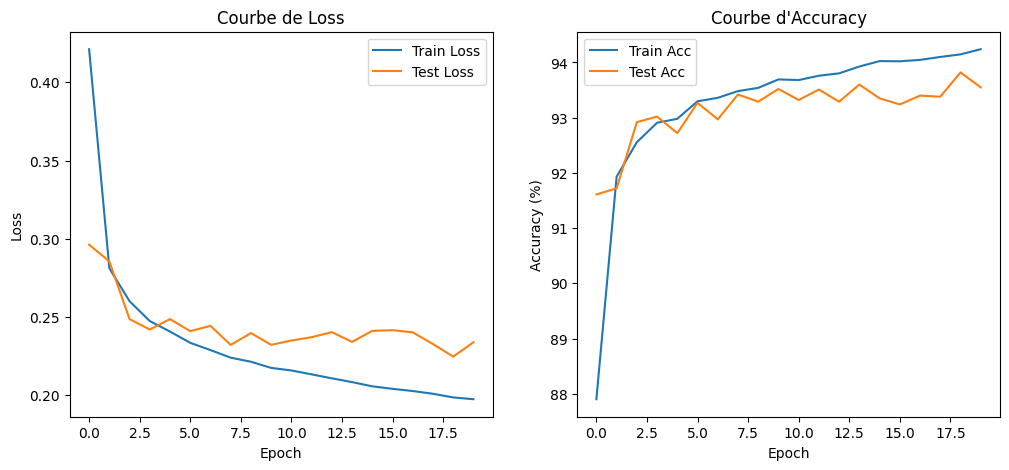

In [9]:
# Tracer les courbes
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(curves['train_loss'], label='Train Loss')
plt.plot(curves['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(curves['train_acc'], label='Train Acc')
plt.plot(curves['test_acc'], label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Courbe d\'Accuracy')
plt.legend()

plt.show()